<a href="https://colab.research.google.com/github/Uzma-sayed/Singapore-Resale-Flat-Prices-Predicting/blob/main/Singapore_Resale_Flat_Prices_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [5]:
  # METHOD 02
# # get file paths in a list
# file_paths = [r"/content/ResaleFlatPricesBasedonApprovalDate19901999."csv",
#                r"/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv",
#               r"/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv".
#               r"/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv",
#               r"/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"]


# # declare an empty list
# dfs = []
# # append each csv to the dfs list
# for file_path in file_paths:
#     df = pd.read_csv(file_path)
#     dfs.append(df)
# # combine them using concat
# combined_df = pd.concat(dfs, ignore_index=True)
# combined_df

In [7]:
  # METHOD 01
df1=pd.read_csv(r"/content/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
894017,2025-02,YISHUN,EXECUTIVE,328,YISHUN RING RD,01 TO 03,142.0,Apartment,1988,845000.0,62 years 05 months
894018,2025-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,800000.0,61 years 05 months
894019,2025-02,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986,818888.0,60 years 05 months
894020,2025-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,960000.0,62 years 02 months


In [8]:
df.shape

(894022, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894022 entries, 0 to 894021
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                894022 non-null  object 
 1   town                 894022 non-null  object 
 2   flat_type            894022 non-null  object 
 3   block                894022 non-null  object 
 4   street_name          894022 non-null  object 
 5   storey_range         894022 non-null  object 
 6   floor_area_sqm       894022 non-null  float64
 7   flat_model           894022 non-null  object 
 8   lease_commence_date  894022 non-null  int64  
 9   resale_price         894022 non-null  float64
 10  remaining_lease      184972 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 75.0+ MB


In [10]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,894022.0,95.660524,25.904574,28.0,73.0,93.0,113.0,366.7
lease_commence_date,894022.0,1987.941072,10.334009,1966.0,1980.0,1986.0,1995.0,2021.0
resale_price,894022.0,313319.951625,166707.744422,5000.0,190000.0,290000.0,406000.0,1600000.0


In [12]:
df['resale_price'].value_counts()

,count
resale_price,
300000.0,6736
280000.0,6483
350000.0,6471
320000.0,6300
250000.0,6253
...,...
209173.0,1
150280.0,1
220388.0,1


# **Data Cleaning**

In [13]:
df.nunique()

,0
month,398
town,27
flat_type,8
block,2730
street_name,589
storey_range,25
floor_area_sqm,217
flat_model,34
lease_commence_date,56
resale_price,9394


In [14]:
df.isna().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


# **REMAINING_LEASE**

In [15]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [16]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [17]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
894017,2025-02,YISHUN,EXECUTIVE,328,YISHUN RING RD,01 TO 03,142.0,Apartment,1988,845000.0,62.416667
894018,2025-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,800000.0,61.416667
894019,2025-02,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986,818888.0,60.416667
894020,2025-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,960000.0,62.166667
894021,2025-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,145.0,Apartment,1987,868888.0,61.833333


In [18]:
df['remaining_lease'].value_counts()

,count
remaining_lease,
68.000000,711654
67.000000,2217
95.000000,2077
69.000000,1857
71.000000,1765
...,...
42.916667,1
40.916667,1
97.583333,1


In [19]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


# **Wrong Formate**

In [20]:
df.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [21]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [22]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
894020,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,960000.0,62.166667,2025,01,1,3
894021,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,145.0,Apartment,1987,868888.0,61.833333,2025,02,1,3


In [23]:
df.drop('storey_range', axis = 1, inplace= True)

In [24]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [25]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [26]:
df.dtypes

,0
town,object
flat_type,object
block,float64
street_name,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64
remaining_lease,float64
resale_year,int64


# **TEXT ERRORS**

In [27]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [28]:
df['town'].value_counts()

,count
town,
TAMPINES,78018
YISHUN,67515
BEDOK,64874
JURONG WEST,64786
WOODLANDS,63022
ANG MO KIO,50789
HOUGANG,48947
BUKIT BATOK,43293
CHOA CHU KANG,36669


In [29]:
df['flat_type'].value_counts()

,count
flat_type,
4 ROOM,338037
3 ROOM,288041
5 ROOM,187377
EXECUTIVE,67489
2 ROOM,11252
1 ROOM,1296
MULTI GENERATION,279
MULTI-GENERATION,251


In [30]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [31]:
df['flat_type'].value_counts()

,count
flat_type,
4 ROOM,338037
3 ROOM,288041
5 ROOM,187377
EXECUTIVE,67489
2 ROOM,11252
1 ROOM,1296
MULTI GENERATION,530


In [32]:
df['street_name'].value_counts()

,count
street_name,
YISHUN RING RD,17018
BEDOK RESERVOIR RD,14385
ANG MO KIO AVE 10,13516
ANG MO KIO AVE 3,11921
HOUGANG AVE 8,9074
...,...
SEMBAWANG WAY,12
OUTRAM HILL,9
ALKAFF CRES,5


In [33]:
df['flat_model'].value_counts()

,count
flat_model,
Model A,182406
Improved,160223
New Generation,106309
NEW GENERATION,78898
IMPROVED,73589
MODEL A,70381
Premium Apartment,42906
Simplified,33046
Apartment,24512


In [34]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [35]:
df['flat_model'].value_counts()

,count
flat_model,
Model A,252787
Improved,233812
New Generation,185207
Simplified,56304
Premium Apartment,42912
Standard,41628
Apartment,34413
Maisonette,28819
Model A2,9790


# **Duplicates**

In [36]:
df.duplicated().sum()

2293

In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## **Outliers**

In [38]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [39]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

# **Using Boxplot**

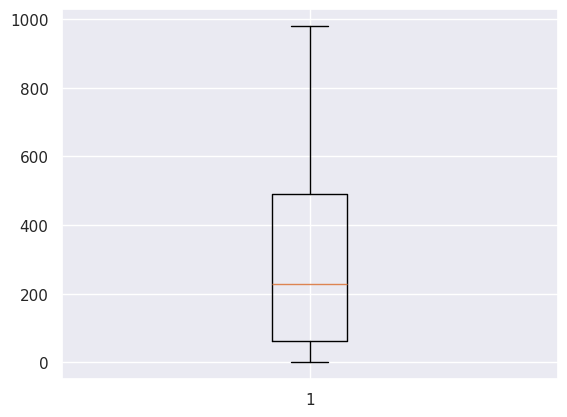

In [40]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [41]:
     # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-579.0, 1133.0)

In [42]:
df.block = df.block.clip(lower_bound , upper_bound)

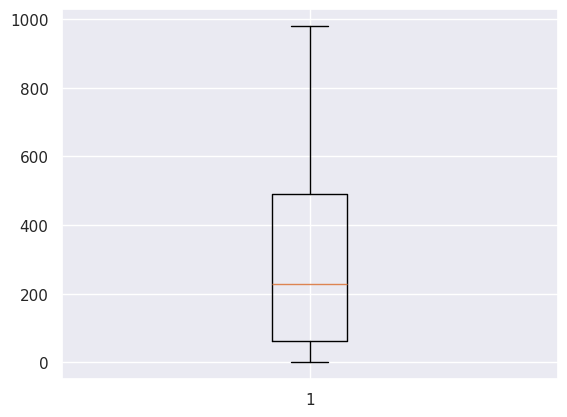

In [43]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

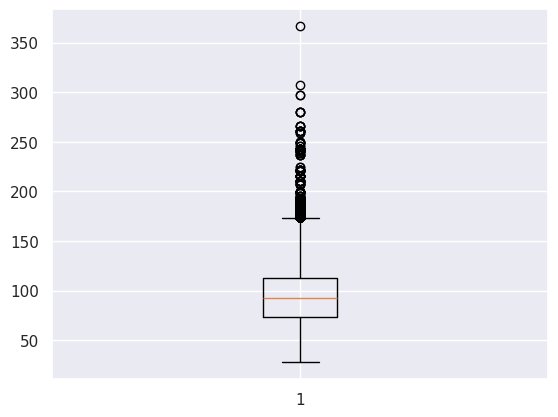

In [44]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [45]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [46]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

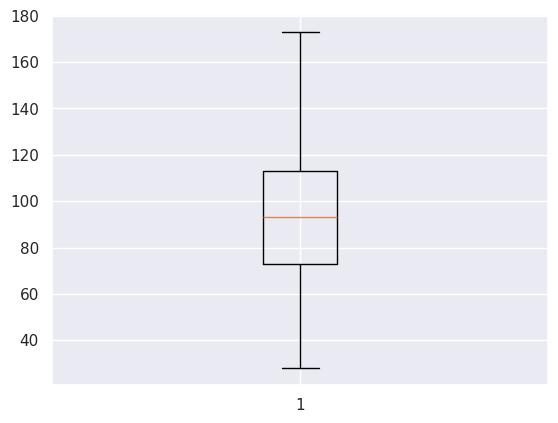

In [47]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

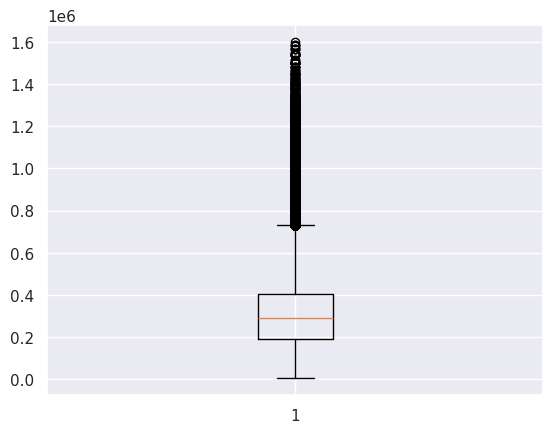

In [48]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [49]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-134000.0, 730000.0)

In [50]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

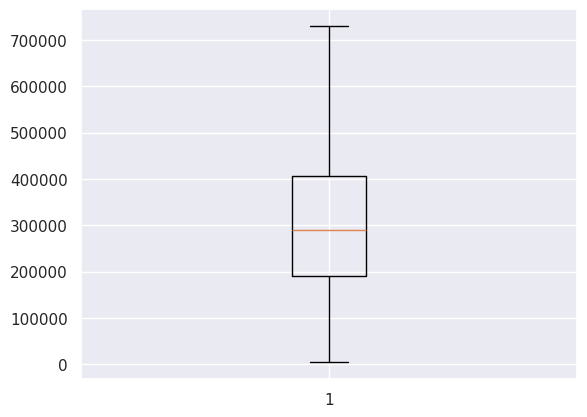

In [51]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

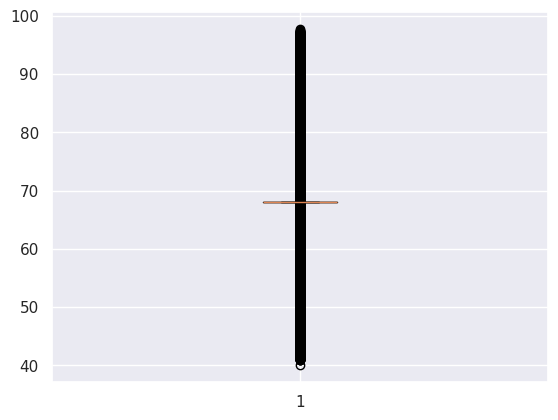

In [52]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [53]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [54]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

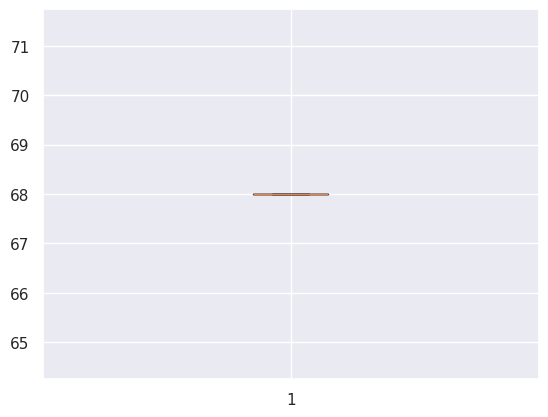

In [55]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

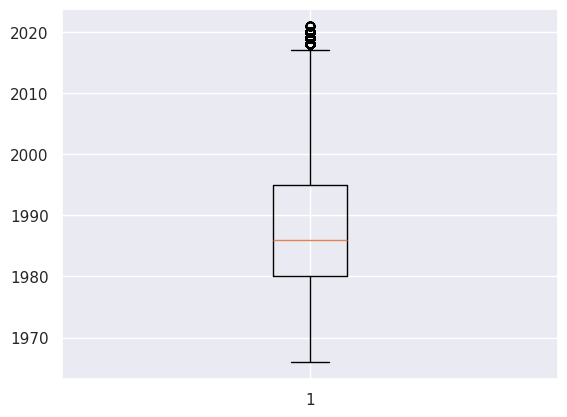

In [56]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [57]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1957.5, 2017.5)

In [58]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

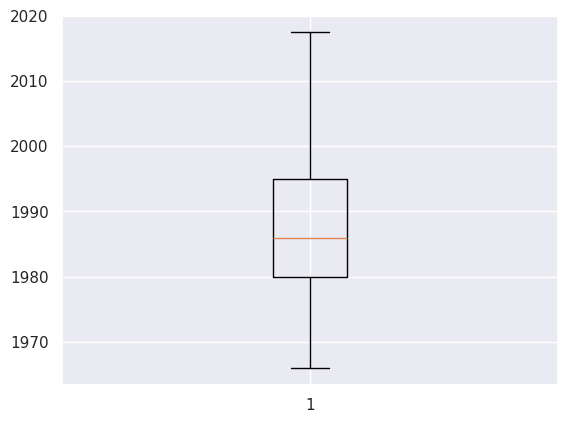

In [59]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

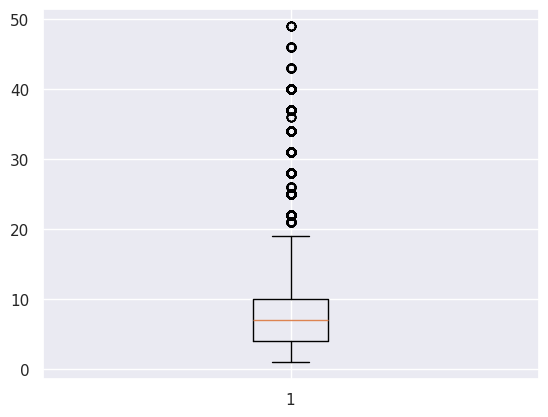

In [60]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [61]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [62]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

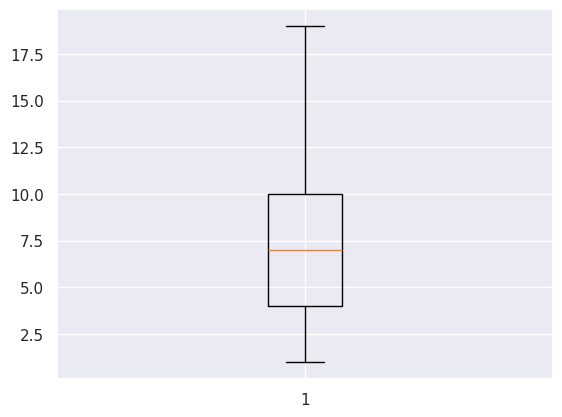

In [63]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

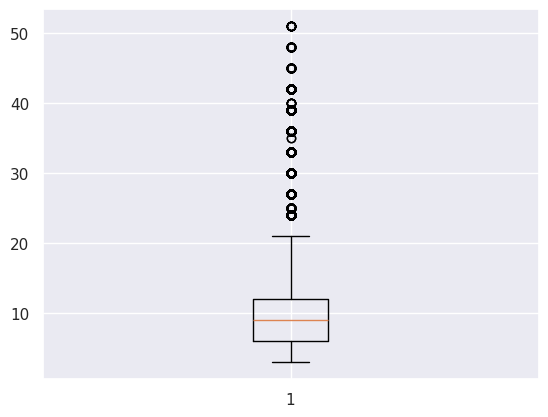

In [64]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [65]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [66]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

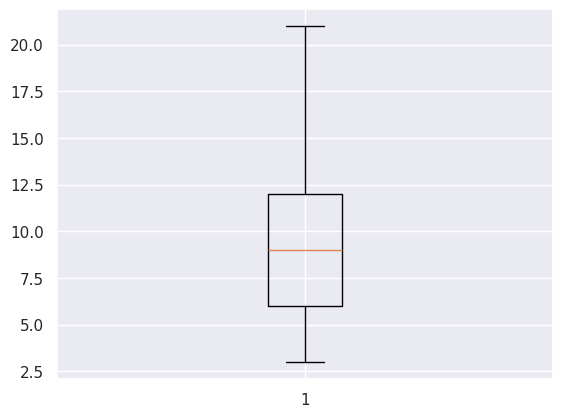

In [67]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

# **EDA - EXPLORATARY DATA ANALYSIS**

### Categorical Vs Frequency using BarPlot

In [68]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

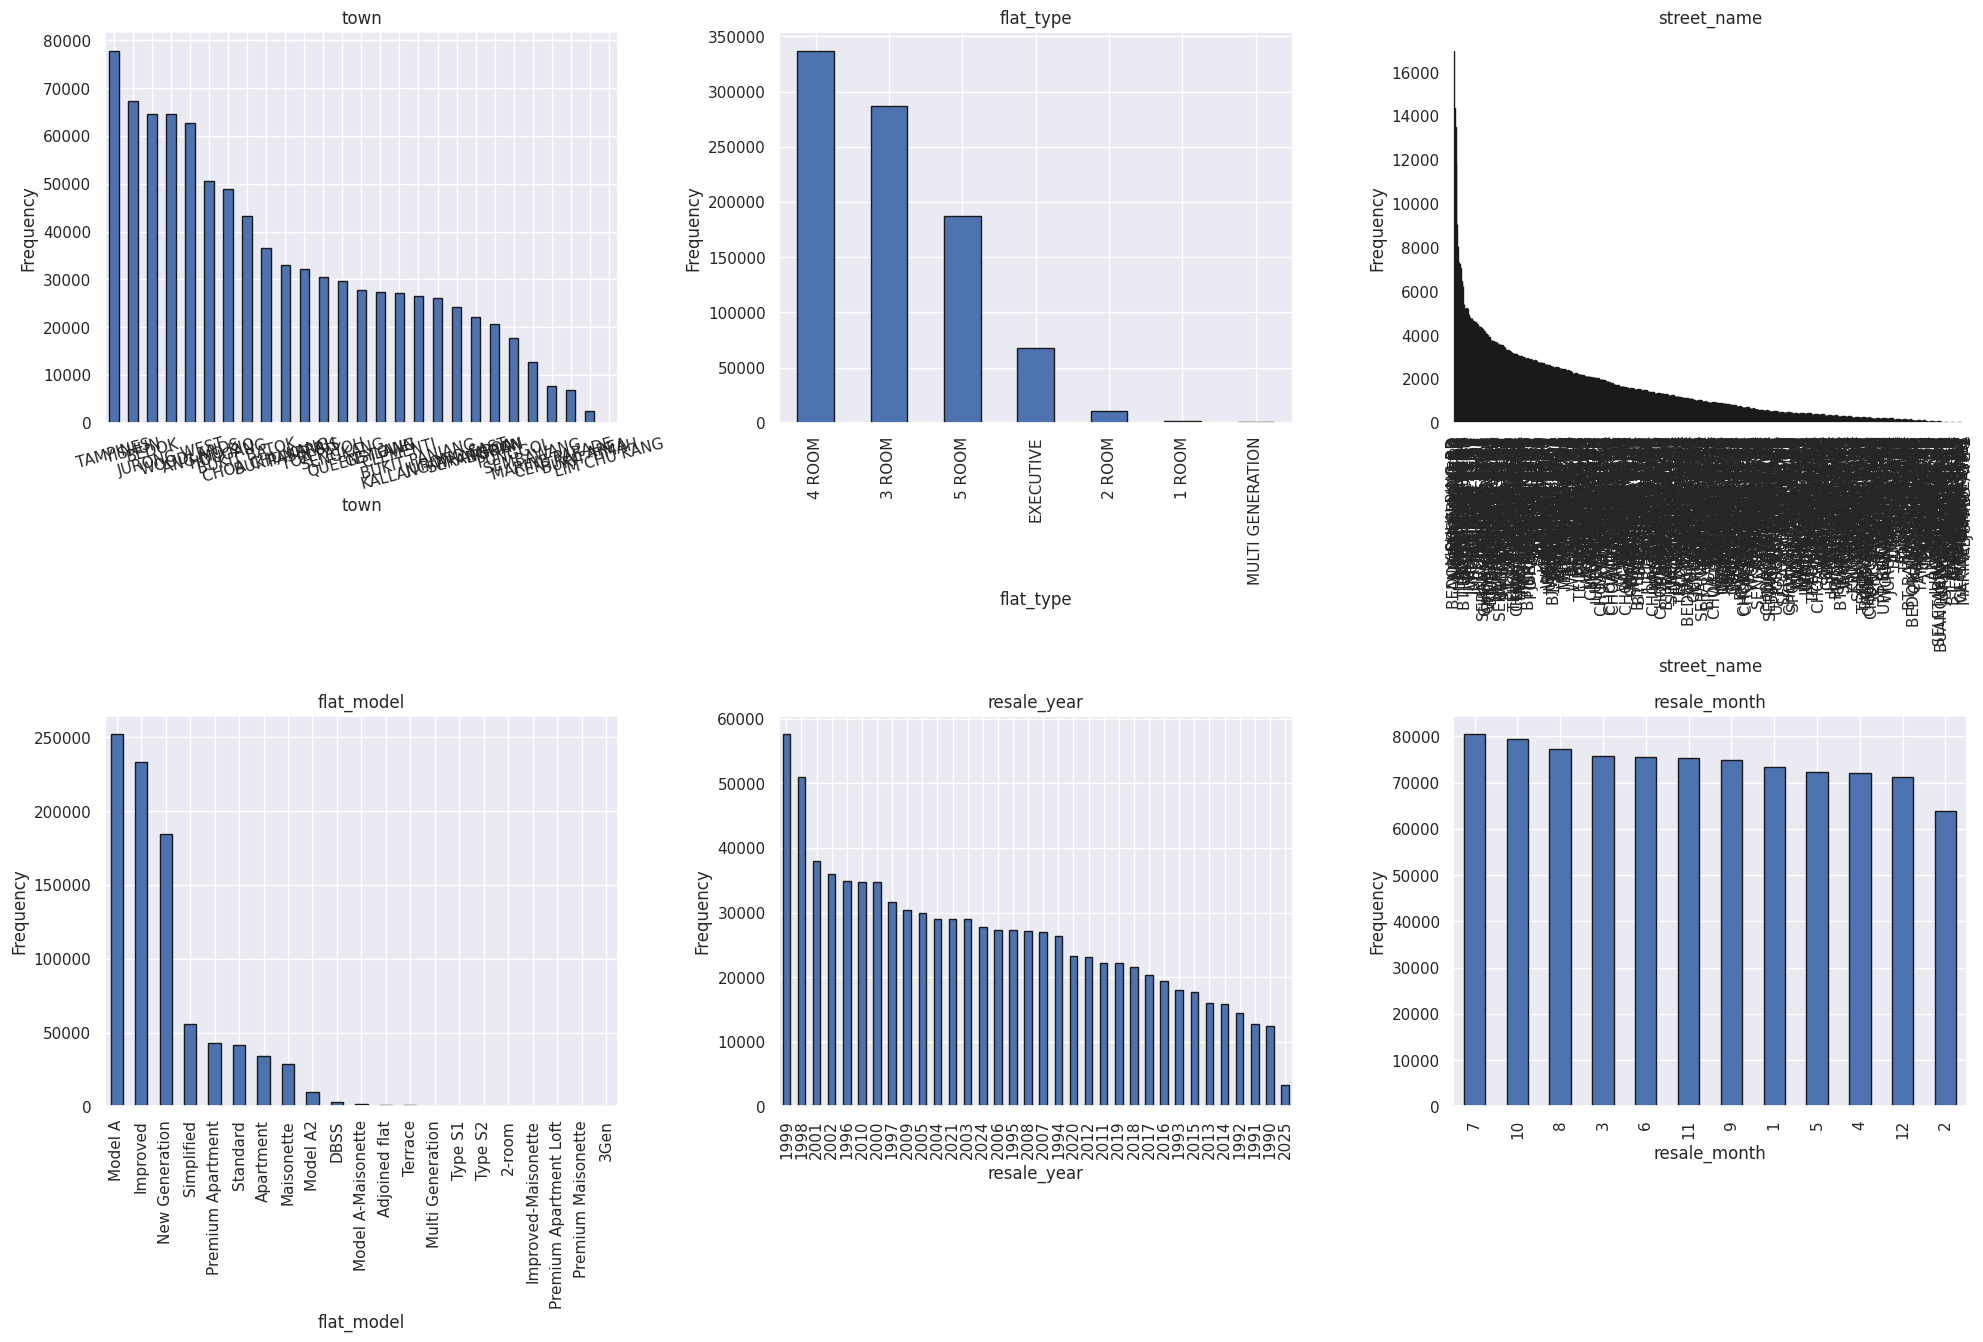

In [69]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Feature Vs Target (Categorical Data )**

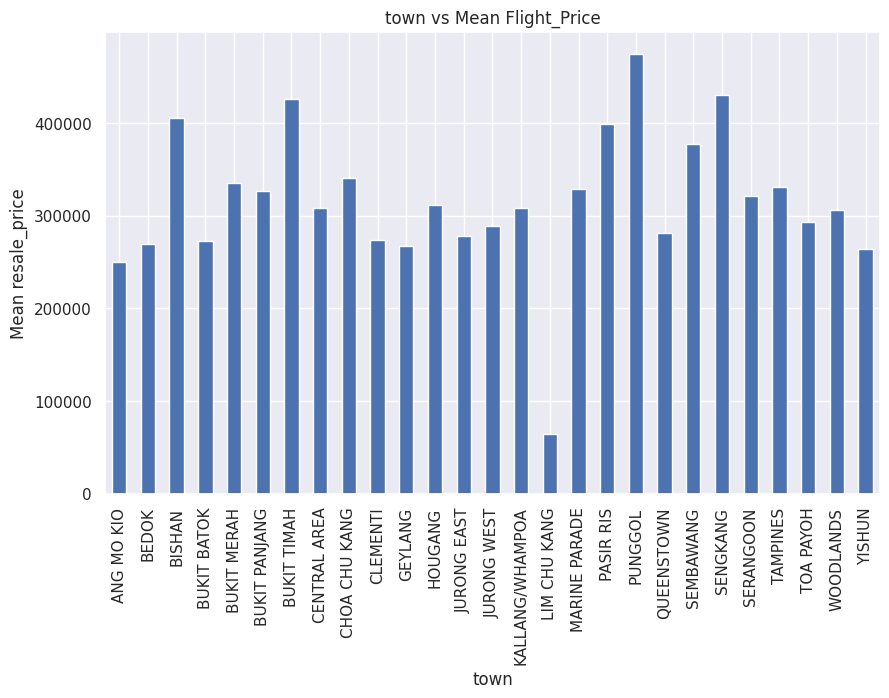

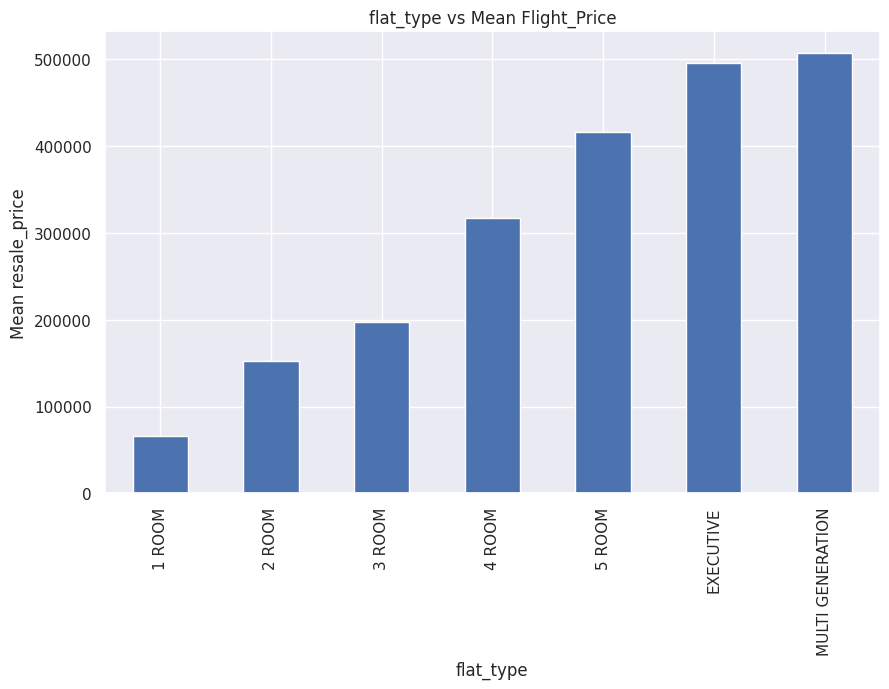

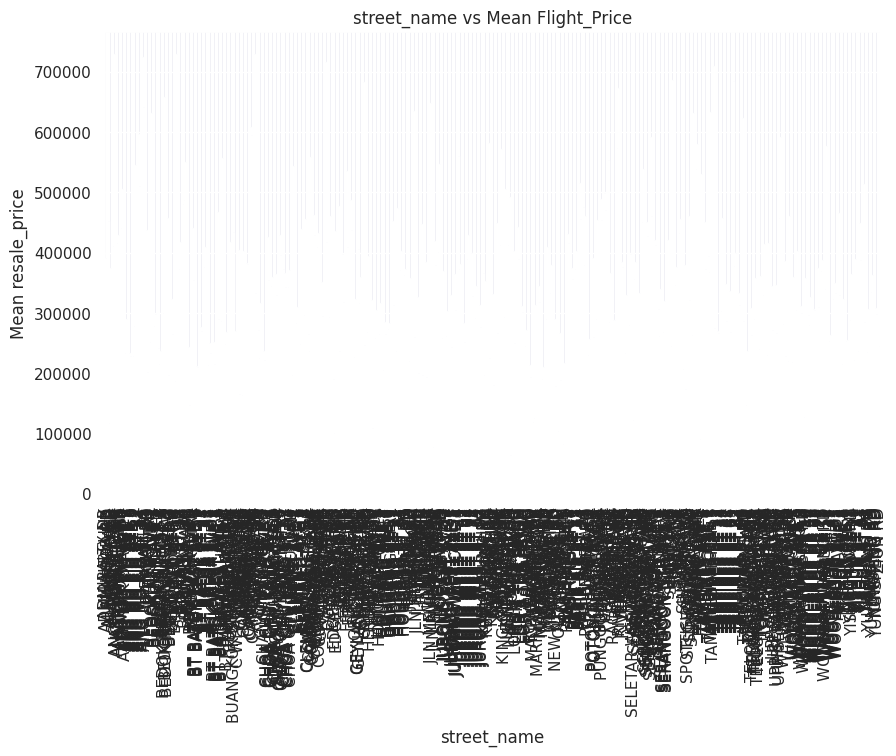

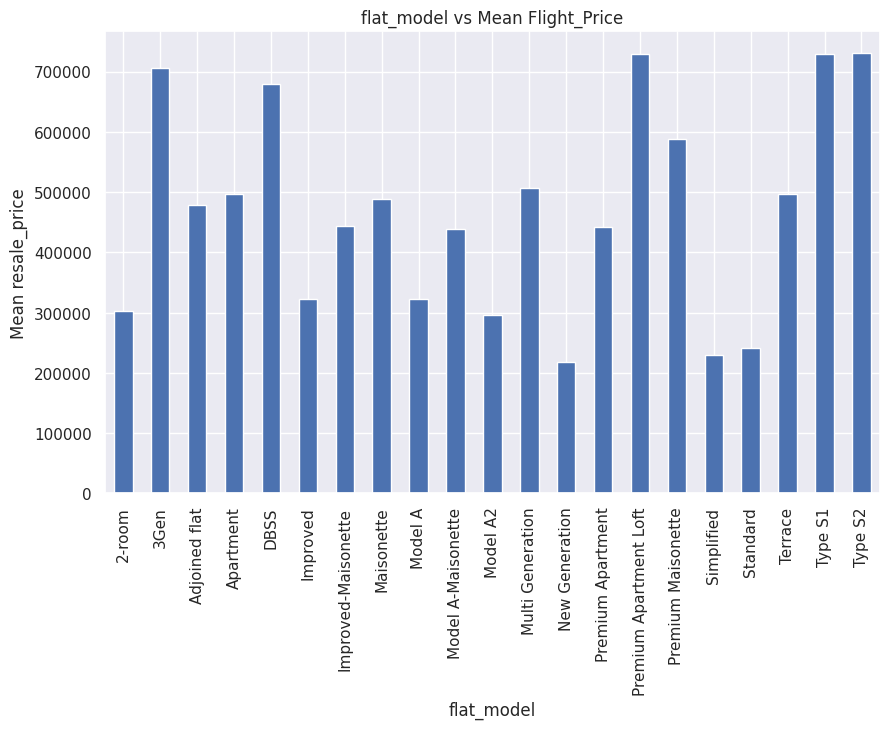

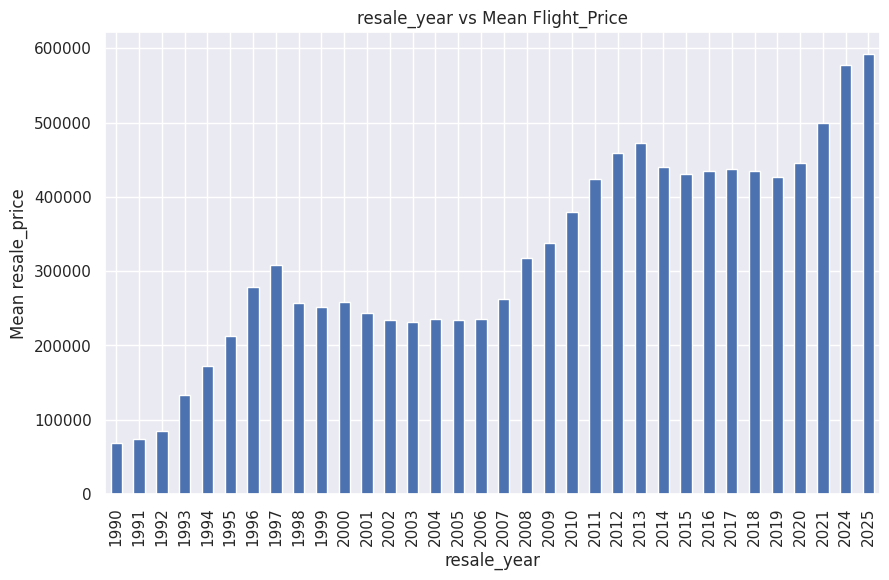

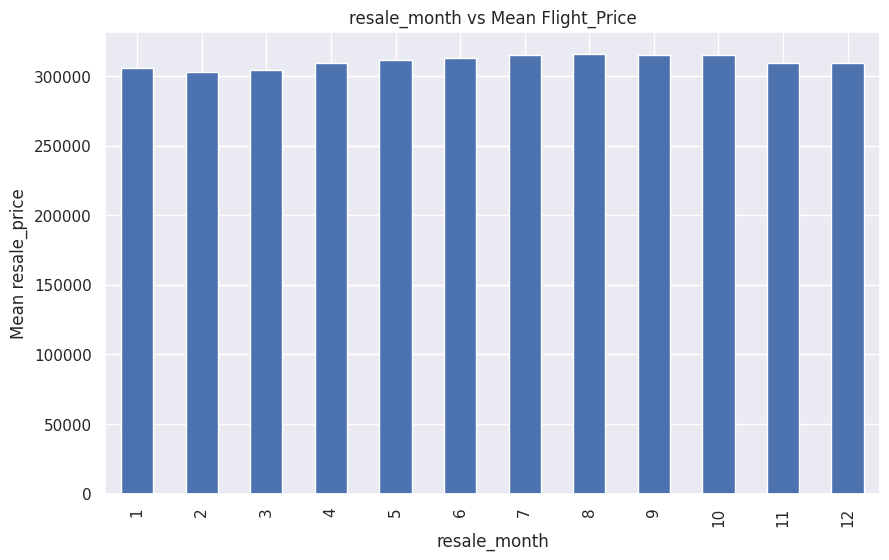

In [70]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

# **Feature Vs Target (Condinues Data )**

In [71]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [72]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

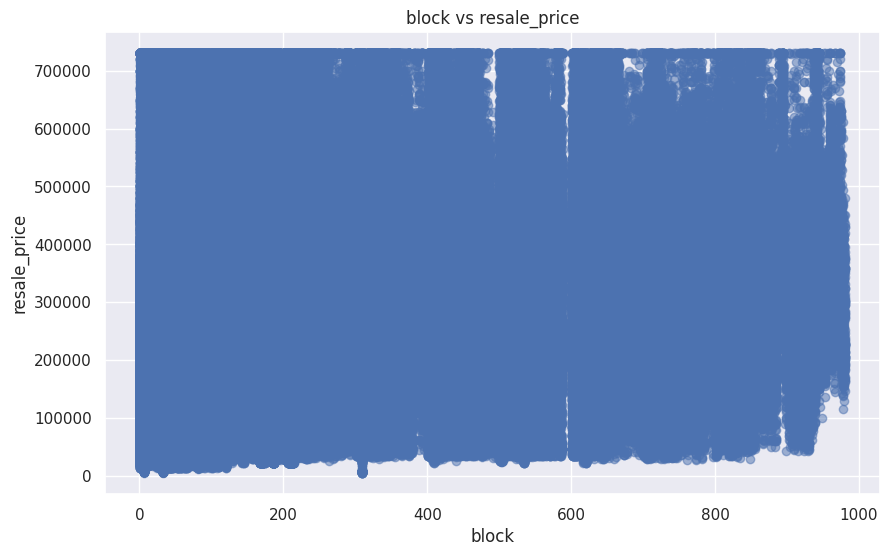

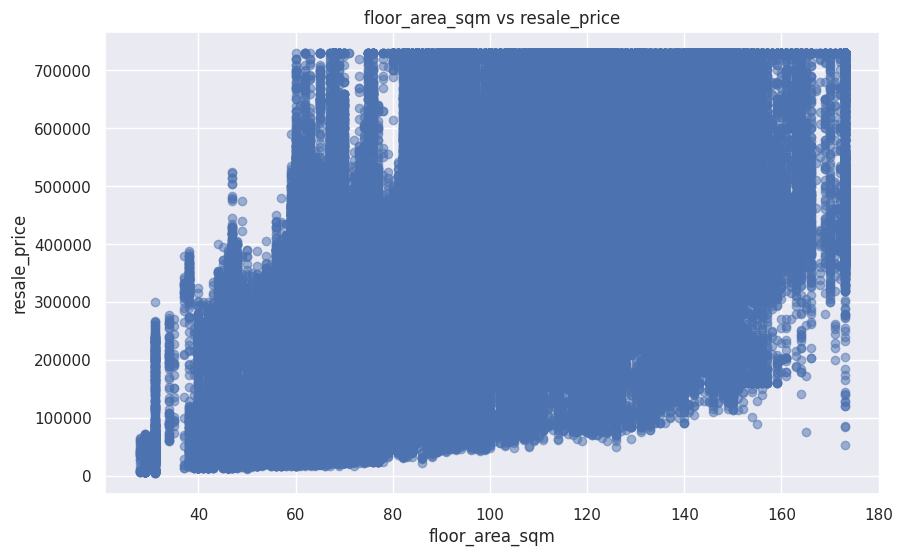

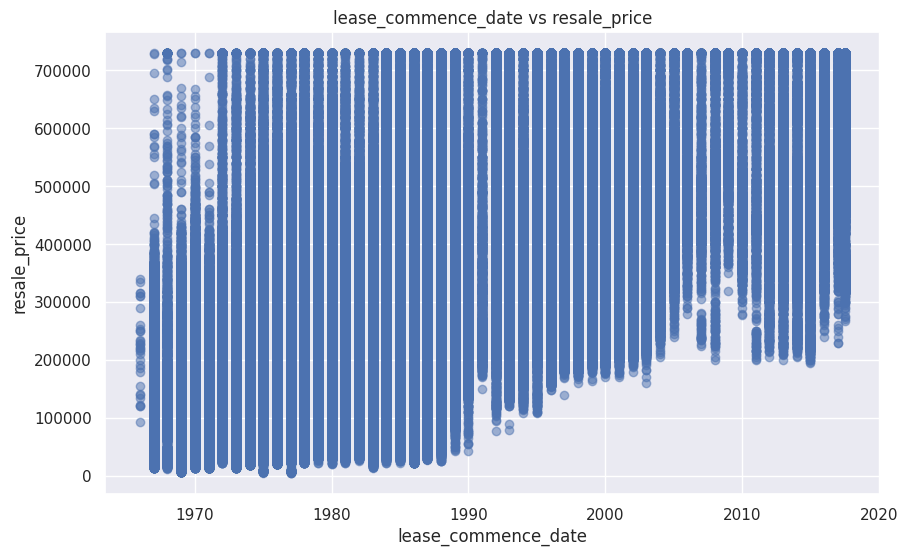

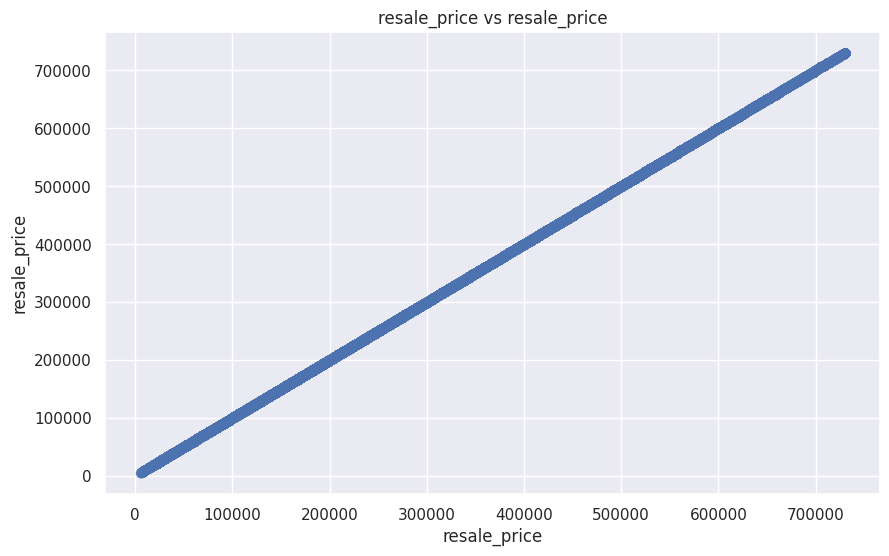

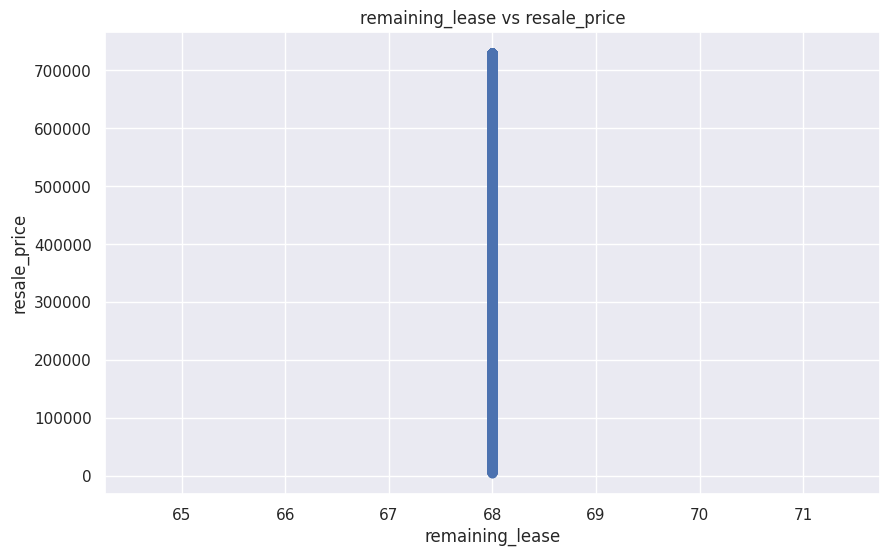

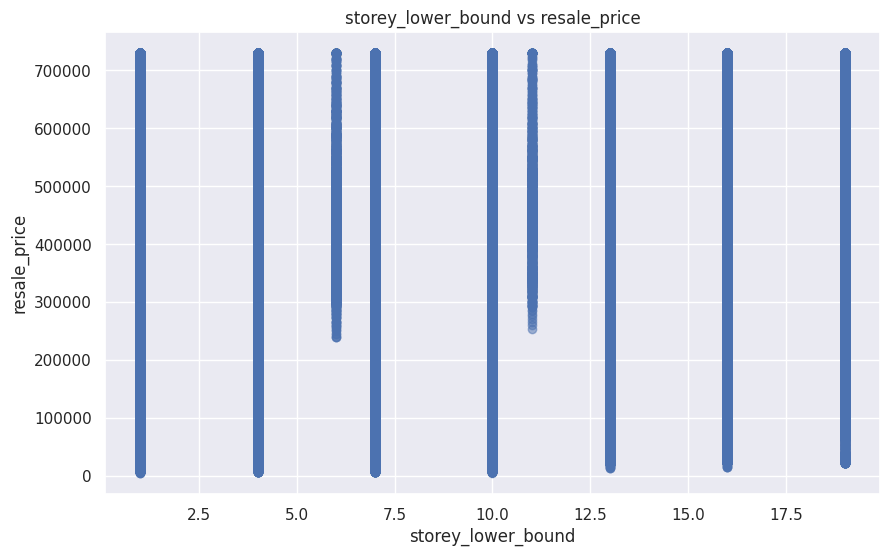

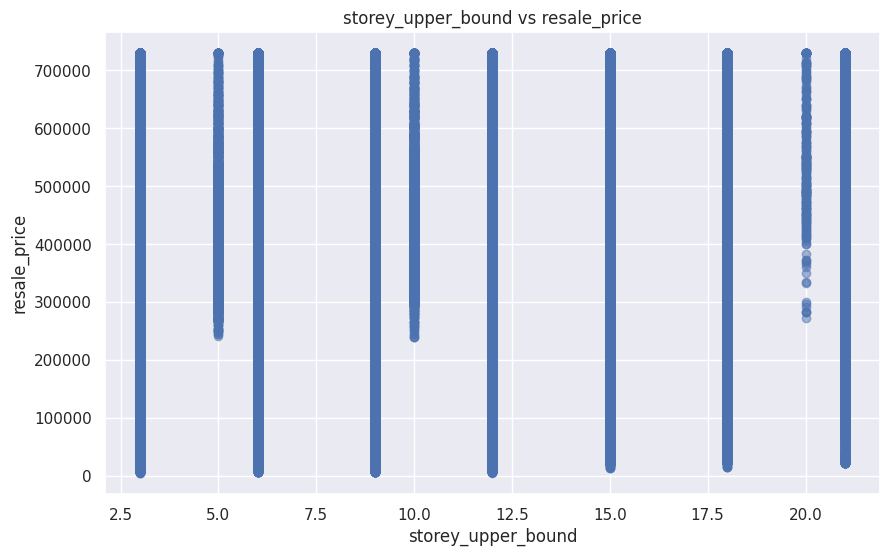

In [73]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

# **Encoding Categorical Variables**

In [74]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [75]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [76]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [77]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [78]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [79]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [80]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [81]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [82]:
# save the processed data for the deployment
df1.to_csv('final.csv')

# **Correlation**

In [83]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.210965,0.056908,0.589060,0.204393,0.162725,0.333903,0.123369,NaN,0.120151,0.005478,-0.019854,-0.019552
flat_type,0.210965,1.000000,0.130274,0.392651,0.954897,0.245598,0.427065,0.610161,NaN,0.102191,0.004841,0.078889,0.079245
block,0.056908,0.130274,1.000000,0.063389,0.188553,0.003475,0.037040,-0.066649,NaN,-0.103372,-0.000441,-0.118272,-0.118348
street_name,0.589060,0.392651,0.063389,1.000000,0.363424,0.354240,0.741178,0.376584,NaN,0.312699,0.009895,0.075579,0.076311
floor_area_sqm,0.204393,0.954897,0.188553,0.363424,1.000000,0.203950,0.408785,0.586759,NaN,0.065031,0.003755,0.045902,0.046102
flat_model,0.162725,0.245598,0.003475,0.354240,0.203950,1.000000,0.359249,0.241956,NaN,0.161430,0.004567,0.014594,0.015000
lease_commence_date,0.333903,0.427065,0.037040,0.741178,0.408785,0.359249,1.000000,0.535247,NaN,0.419402,0.010474,0.141247,0.141788
resale_price,0.123369,0.610161,-0.066649,0.376584,0.586759,0.241956,0.535247,1.000000,NaN,0.670954,0.016887,0.199132,0.202152
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.120151,0.102191,-0.103372,0.312699,0.065031,0.161430,0.419402,0.670954,NaN,1.000000,-0.012282,0.088446,0.090874


# **Heatmap**

<Axes: >

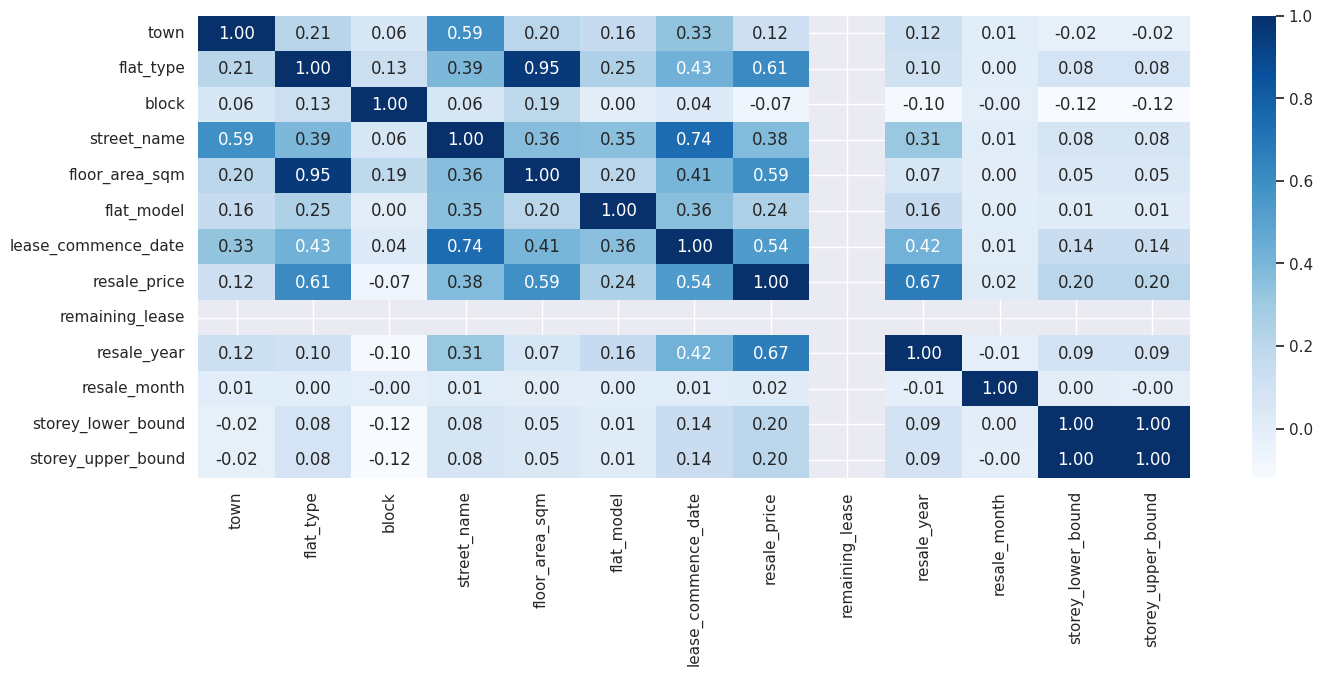

In [84]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

# **RIGHT TO MACHINE LEARNING**

## **Split**

In [85]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [86]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(713383, 12) (178346, 12) (713383,) (178346,)


## **Scalling**

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.49115494, -0.01206657, -0.43128427, ..., -1.63479349,
          0.10345868,  0.10008102],
        [-1.36270933,  1.0406524 , -0.13006265, ...,  0.12242352,
          1.46095396,  1.45778268],
        [-1.61960055, -1.06478553, -0.68293777, ...,  1.58677103,
          0.78220632,  0.77893185],
        ...,
        [ 1.46309411,  1.0406524 , -0.20250836, ..., -0.17044598,
          1.46095396,  1.45778268],
        [ 0.30708361, -0.01206657, -0.77444814, ...,  0.41529302,
          1.46095396,  1.45778268],
        [-1.23426372, -0.01206657,  0.43425127, ...,  0.70816252,
         -0.57528896, -0.57876981]]),
 array([[-1.10581811,  1.0406524 , -0.80495159, ...,  0.70816252,
         -0.57528896, -0.57876981],
        [ 0.94931167, -0.01206657,  0.85748671, ...,  0.41529302,
          0.78220632,  0.77893185],
        [ 1.07775728, -0.01206657,  1.9212947 , ...,  1.00103202,
         -1.25403661, -1.25762064],
        ...,
        [ 0.69242045, -0.01206657, -0.14531438, ...,  

# **Model_Fit**

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Linear Regression**

In [89]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[577142.79407747 343361.44006839 272919.11246646 ... 192174.66149838
 447707.09480179  78312.2909507 ]
824529    720000.0
529415    270000.0
590818    300000.0
419618    162000.0
615732    575000.0
            ...   
406774    349000.0
348143    109000.0
167731    325000.0
632849    513000.0
78904      82000.0
Name: resale_price, Length: 178346, dtype: float64


In [90]:
linear_model.score(X_test, y_test)

0.7845441247623286

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7838349088767741

# **K Nearest Neighbor Regression**

In [92]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28358.579885525884
Mean Squared Error (MSE)     : 1724015142.4777768
Root Mean Square Error (RMSE): 41521.26133052531
R-squared (R2) Score         : 0.9310799492812804


# **Decision Tree Regression**

In [93]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17034.55663357276
Mean Squared Error (MSE)     : 634138478.3128555
Root Mean Square Error (RMSE): 25182.10631207913
R-squared (R2) Score         : 0.9746493780645102


# **Random Forest Regression**

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13564.967480354437
Mean Squared Error (MSE)     : 382747934.57476974
Root Mean Square Error (RMSE): 19563.944760062317
R-squared (R2) Score         : 0.9846990862125108


# **Xg Boost Regression**

In [95]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16529.025669638257
Mean Squared Error (MSE)     : 535393106.52802837
Root Mean Square Error (RMSE): 23138.563190657027
R-squared (R2) Score         : 0.978596870092839


# **Finalizeing Models**

In [96]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9310799492812804
DecisionTreeRegressor 0.9746493780645102
RandomForestRegressor 0.9846990862125108
XGBRegressor 0.978596870092839

Model: RandomForestRegressor contain Maximum R2_Score: 0.9846990862125108 


# **Suggestion**

In [97]:
rf_regressor.feature_importances_

array([0.0413566 , 0.05148294, 0.01487024, 0.02268138, 0.28928307,
       0.00766548, 0.0293098 , 0.        , 0.52588512, 0.00677914,
       0.00417014, 0.0065161 ])

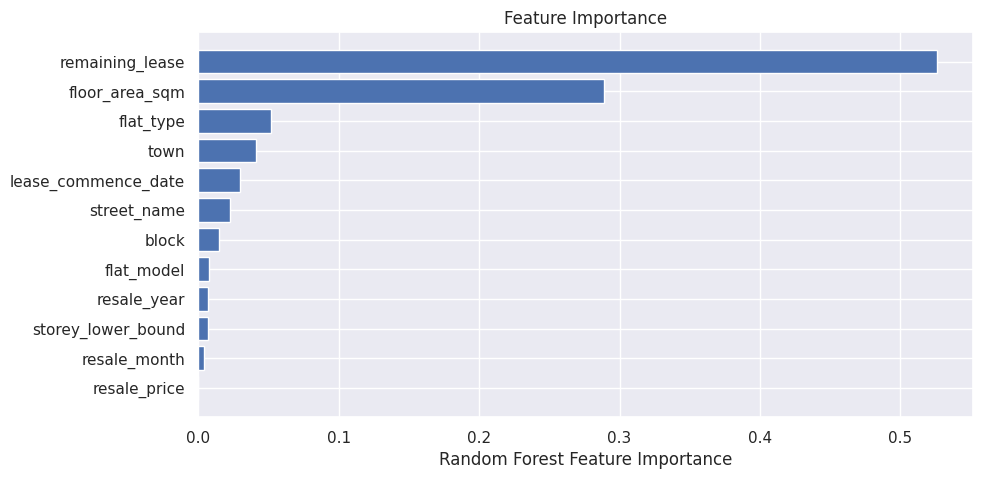

In [98]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

# **Save the model**

In [99]:
model=rf_regressor.fit(X_train, y_train)

In [100]:
model

RandomForestRegressor(random_state=42)

In [101]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit([[1], [2], [3]], [2, 4, 6]) # Sample training data


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


# Predicting

In [102]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
821332,21,4,201.0,213,91.0,15,1980.0,278000.0,68.0,2020,7,10,12
688845,27,5,2.0,504,109.0,14,2002.0,533000.0,68.0,2013,9,4,6
428775,9,3,364.0,86,81.0,15,1978.0,188000.0,68.0,2004,2,1,3
833837,1,3,473.0,4,81.0,15,1984.0,350000.0,68.0,2021,1,13,15
796378,19,5,2.0,535,113.0,14,2015.0,650000.0,68.0,2019,5,4,6


In [103]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

# **Resale Price**

In [104]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([277040.        , 534833.33333333, 224556.        , 350970.4       ,
       651633.72571429])